# Ballot measure cash analysis

In [1]:
import csv
import glob
import pandas as pd
import numpy as np
import altair as alt
from altair import datum

pd.options.display.float_format = '{:,.2f}'.format

alt.renderers.enable('notebook')

%run '../../sunsentinel-altair-theme/sunsentinel_theme.py'

In [2]:
ballot_measures_df = pd.read_csv('ballot_petition_stats.csv', encoding="ISO-8859-1", parse_dates=["Date"])
ballot_measures_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 15 columns):
Unnamed: 0                         496 non-null int64
Elec Year                          496 non-null object
Status                             496 non-null object
Date                               494 non-null datetime64[ns]
Title                              495 non-null object
Serial #(Ballot #)                 408 non-null object
Sponsor                            496 non-null object
sponsor_total_spent                211 non-null float64
sig_companies_paid                 211 non-null object
total_paid_to_sig_companies        211 non-null float64
top_expenses                       211 non-null object
sponsor_total_raised               424 non-null float64
sig_company_donors                 227 non-null object
total_raised_from_sig_companies    423 non-null float64
top_donors                         227 non-null object
dtypes: datetime64[ns](1), float64(4), int64(1), object(9)


In [3]:
deduped_measures = ballot_measures_df[["Elec Year", "Status", 
                                       "Date", "Title", "Sponsor",
                                      "total_paid_to_sig_companies",
                                      "sig_company_donors"]].groupby("Sponsor").first()

deduped_measures.reset_index()

,Sponsor,Elec Year,Status,Date,Title,total_paid_to_sig_companies,sig_company_donors
0,"""Right Now"" is the Time to Legalize Recreation...",2016 GEN,Withdrawn,2015-09-14,Marijuana use for recreational purposes in the...,nan,NaN
1,Abolish Abortion Florida (AAFL),2018 GEN,Closed,2018-07-12,ABOLISH ABORTION,nan,set()
2,Acupuncture for Florida,2018 GEN,Closed,2017-01-06,Basic Acupuncture Benefits for Legal Residents...,nan,NaN
3,"All Voters Vote, Inc.",2020 GEN,Active,2019-03-14,All Voters Vote in Primary Elections for State...,"6,417,791.62",set()
4,American Family Political Committee of Florida,1994 GEN,Removed,1994-03-03,LAWS RELATED TO DISCRIMINATION ARE RESTRICTED ...,0.00,NaN
5,Ax the Tax,2018 GEN,Closed,2018-01-30,REFERENDUM APPROVAL REQUIRED FOR AD VALOREM TA...,0.00,set()
6,Ban Assault Weapons Now,2020 GEN,Active,2019-01-11,Prohibits possession of defined assault weapons,"390,670.31","{'CONCEPCION BEVERLY', 'CONCEPCION ALMA', 'HER..."
7,"Citizens For A Fair Share, Inc.",2004 GEN,Passed,2003-09-08,The Medical Liability Claimant's Compensation ...,0.00,set()
8,Citizens For the Restoration of Families & Com...,2014 GEN,Closed,2013-11-25,Restorative Parole Amendment of 2014,nan,set()
9,Citizens Protecting Their Right to Elect Flori...,1994 GEN,Closed,1994-06-06,To Secure Voters' Right to Elect and Preserve ...,nan,NaN


## Total money raised by petition sponsors

In [4]:
sponsor_totals = ballot_measures_df[["Sponsor", "sponsor_total_raised"]].groupby("Sponsor").first().reset_index()
print("Total raised by sponsors:", sponsor_totals.sponsor_total_raised.sum())
sponsor_totals.sort_values("sponsor_total_raised", ascending=False).head(10)

Total raised by sponsors: 294540335.51


,Sponsor,sponsor_total_raised
210,Voters In Charge,"46,446,806.17"
111,Floridians for Patient Protection,"28,977,457.00"
119,"Floridians for a Fair Democracy, Inc.","26,754,766.06"
35,Consumers for Smart Solar,"25,944,125.13"
97,Floridians For a Level Playing Field,"18,227,777.70"
152,Save Our Everglades Committee,"14,447,613.57"
136,People United for Medical Marijuana,"14,310,684.77"
53,FairDistrictsFlorida.org.,"9,162,456.55"
7,"Citizens For A Fair Share, Inc.","9,114,573.58"
62,Florida Citizen Voters,"8,294,707.25"


## Total money paid to signature gathering companies

In [5]:
deduped_measures.total_paid_to_sig_companies.sum()

56994919.650000006

## Active petitions

In [6]:
active_measures = ballot_measures_df[ballot_measures_df["Status"] == "Active"]
active_measures.head()

,Unnamed: 0,Elec Year,Status,Date,Title,Serial #(Ballot #),Sponsor,sponsor_total_spent,sig_companies_paid,total_paid_to_sig_companies,top_expenses,sponsor_total_raised,sig_company_donors,total_raised_from_sig_companies,top_donors
1,1,2020 GEN,Active,2019-09-06,ADULT USE OF MARIJUANA,19-10,Make It Legal Florida,"2,657,238.45",set(),0.00,"{'ROBERT WATKINS & COMPANY, P.A.', 'COREMESSAG...","2,819,560.40",set(),0.00,"{'DALY THOMAS', 'POLLACK GREGG', 'HAWES KEN', ..."
2,2,2020 GEN,Active,2019-01-29,All drivers may complete community service in ...,19-02,"Drivers Ready to Improve, Vote and Empower (D....",786.94,set(),0.00,"{'MIAMI PRINTING', 'UNITED STATES POSTAL SERVI...","1,131.95",set(),0.00,"{'MIAMI PRINTING', 'LEMUS TONY', 'WILLS ISABEL..."
4,4,2020 GEN,Active,2015-04-16,All tolls shall be approved by voters,15-07,"Drivers Ready to Improve, Vote and Empower (D....",786.94,set(),0.00,"{'MIAMI PRINTING', 'UNITED STATES POSTAL SERVI...","1,131.95",set(),0.00,"{'MIAMI PRINTING', 'LEMUS TONY', 'WILLS ISABEL..."
5,5,2020 GEN,Active,2016-05-16,All traffic citations must be issued without u...,16-04,"Drivers Ready to Improve, Vote and Empower (D....",786.94,set(),0.00,"{'MIAMI PRINTING', 'UNITED STATES POSTAL SERVI...","1,131.95",set(),0.00,"{'MIAMI PRINTING', 'LEMUS TONY', 'WILLS ISABEL..."
6,6,2020 GEN,Active,2019-03-14,All Voters Vote in Primary Elections for State...,19-07,"All Voters Vote, Inc.","6,888,895.92","{'AP PETITIONING PARTNERS LLC', 'BH-AP PETITIO...","6,417,791.62","{'VANCORE JONES COMMUNICATIONS', 'BH-AP PETITI...","6,895,571.90",set(),0.00,"{'STEARNS WEAVER MILLER PA', 'MBF FAM INVESTME..."


In [7]:
active_deduped = active_measures[["Elec Year", "Status", 
                                       "Date", "Title", "Sponsor",
                                      "total_paid_to_sig_companies", "sponsor_total_raised",
                                      "sig_company_donors"]].groupby("Sponsor").first()

active_deduped.reset_index().total_paid_to_sig_companies.sum()

17581661.930000003

In [8]:
active_deduped.reset_index().sponsor_total_raised.sum()

39489627.86

In [34]:
active_deduped.reset_index()[["Sponsor", "sponsor_total_raised"]].to_csv("sponsor_fundraising_totals.csv")

In [28]:
active_measures[["Sponsor", "Title", "sponsor_total_raised"]].sort_values("sponsor_total_raised", ascending=False).to_csv("active_campaign_donations_totals.csv")

## Petitions that passed

In [10]:
passed_measures = ballot_measures_df[ballot_measures_df["Status"] == "Passed"]
passed_citizen_measures = passed_measures[~((passed_measures["Sponsor"] == "Constitution Revision Commission") |  (passed_measures["Sponsor"].str.startswith("The Florida Legislature")))]

passed_citizen_measures

,Unnamed: 0,Elec Year,Status,Date,Title,Serial #(Ballot #),Sponsor,sponsor_total_spent,sig_companies_paid,total_paid_to_sig_companies,top_expenses,sponsor_total_raised,sig_company_donors,total_raised_from_sig_companies,top_donors
68,68,2018 GEN,Passed,2015-10-26,Voter Control of Gambling in Florida,15-22 (3),Voters In Charge,"45,130,228.90","{'NATIONAL VOTER OUTREACH, INC.'}","5,314,243.95","{'CONSENSUS MEDIA, LLC', 'HILL RESEARCH CONSUL...","46,446,806.17",set(),0.00,"{'MHD COMMITTEE FOR RESPONSIVE GOVERNMENT', 'S..."
69,69,2018 GEN,Passed,2014-10-31,Voting Restoration Amendment,14-01 (4),"Floridians for a Fair Democracy, Inc.",nan,NaN,nan,NaN,"26,754,766.06",NaN,nan,NaN
88,88,2016 GEN,Passed,2015-01-09,Use of Marijuana for Debilitating Medical Cond...,15-01 (2),People United for Medical Marijuana,"13,961,051.29","{'PCI CONSULTANTS INC', 'NATIONAL VOTER OUTREA...","6,689,870.24","{'IMPACT POLITICS', 'POLLARA CONSULTING GROUP'...","14,310,684.77",set(),0.00,"{'CENTER FOR POLICY REFORM', 'THE MORGAN FIRM ..."
103,103,2014 GEN,Passed,2012-09-17,Water and Land Conservation - Dedicates funds ...,12-04 (1),"Florida's Water and Land Legacy, Inc.","6,120,670.43","{'PCI', 'PCI CONSULTANTS'}","1,846,653.15","{'ADP PAYROLL', 'SHELLIE LEVIN SOLUTIONS', 'MU...","6,853,285.50",set(),0.00,"{'THE TRUST FOR PUBLIC LAND', 'THE FLORIDA CON..."
160,160,2010 GEN,Passed,2010-11-02,STANDARDS FOR LEGISLATURE TO FOLLOW IN CONGRES...,07-15 (6),FairDistrictsFlorida.org.,"9,101,693.65",{'PCI CONSULTANTS INC'},"2,732,600.90","{'FACE ALLIANCE', 'MISSION CONTROL INC.', 'SUN...","9,162,456.55",set(),0.00,"{'EYCHANER FRED', 'NATIONAL EDUCATION ASSOCIAT..."
162,162,2010 GEN,Passed,2010-11-02,STANDARDS FOR LEGISLATURE TO FOLLOW IN LEGISLA...,07-16 (5),FairDistrictsFlorida.org.,"9,101,693.65",{'PCI CONSULTANTS INC'},"2,732,600.90","{'FACE ALLIANCE', 'MISSION CONTROL INC.', 'SUN...","9,162,456.55",set(),0.00,"{'EYCHANER FRED', 'NATIONAL EDUCATION ASSOCIAT..."
169,169,2008 GEN,Passed,2008-11-04,ASSESSMENT OF WORKING WATERFRONT PROPERTY BASE...,-6,Florida Taxation and Budget Reform Commission,nan,NaN,nan,NaN,nan,NaN,nan,NaN
170,170,2008 GEN,Passed,2008-11-04,CHANGES AND IMPROVEMENTS NOT AFFECTING THE ASS...,-3,Florida Taxation and Budget Reform Commission,nan,NaN,nan,NaN,nan,NaN,nan,NaN
175,175,2008 GEN,Passed,2008-11-04,Florida Marriage Protection Amendment,05-10 (2),Florida4Marriage.org,"903,207.52",set(),0.00,"{'DESIGN FOR ADVERTISING, INC.', 'THE BROADCAS...","2,155,126.36",set(),0.00,"{'FOCUS ON THE FAMILY ACTION, INC.', 'FLORIDA ..."
189,189,2008 GEN,Passed,2008-11-04,PROPERTY TAX EXEMPTION OF PERPETUALLY CONSERVE...,-4,Florida Taxation and Budget Reform Commission,nan,NaN,nan,NaN,nan,NaN,nan,NaN


## Analyze all contributions

In [11]:
path = r'data/committee_contribs' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
#     print(filename, df.size)
    li.append(df)

contribs_df = pd.concat(li, axis=0, ignore_index=True)
contribs_df.info()

/Users/ss-edt-04455/Documents/GitHub/notebooks/env/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # This is added back by InteractiveShellApp.init_path()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203142 entries, 0 to 203141
Data columns (total 12 columns):
Unnamed: 0                203142 non-null object
amount                    203142 non-null float64
contributor_address       202697 non-null object
contributor_address2      202886 non-null object
contributor_name          203124 non-null object
contributor_occupation    97912 non-null object
date                      203131 non-null object
inkind_description        3457 non-null object
item_type                 203142 non-null object
report_type               203142 non-null object
report_year               203142 non-null float64
type                      203142 non-null object
dtypes: float64(2), object(10)
memory usage: 18.6+ MB


In [12]:
contribs_annually = contribs_df[["amount", "report_year"]].groupby("report_year").amount.sum().reset_index()

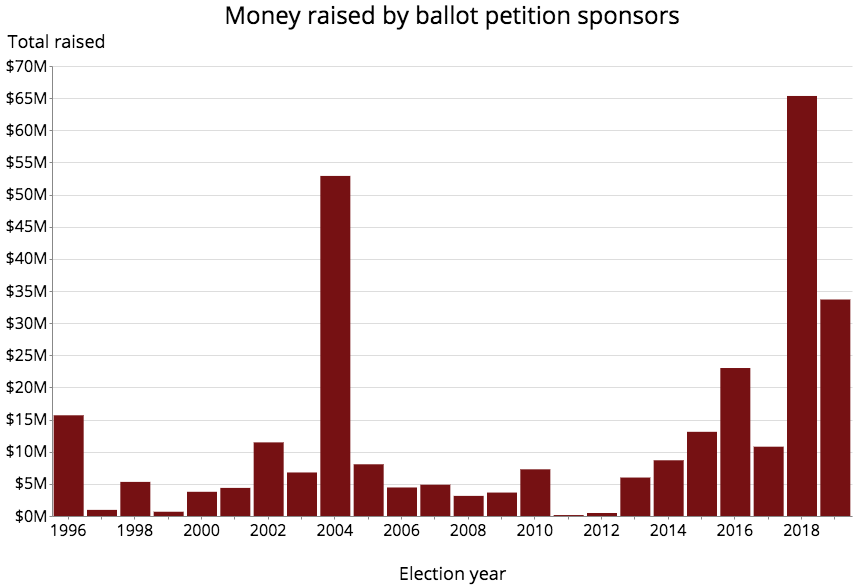

In [13]:
alt.Chart(contribs_annually).mark_bar().encode(
    alt.X('report_year:O', axis=alt.Axis(title="Election year")),
    alt.Y('amount', axis=alt.Axis(title="Total raised", format="$~s"))
    ).properties(
        title="Money raised by ballot petition sponsors"
)

In [14]:
contribs_annually.to_csv("annual_fundraising.csv")

## Dark money

In [15]:
# Declare list of dark money groups
dark_money_groups = [
    "CITIZEN VOTERS, INC.",
    "CITIZEN VOTERS, INC",
    "SACE-ACTION FUND",
    "SACE- ACTION FUND",
    "CONSERVATIVES FOR ENERGY FREEDOM",
    "FLORIDA CONSERVATION VOTER",
    "AMERICANS FOR GUN SAFETY NOW",
    "FLORIDIANS FOR GOVERNMENT ACCOUNTABILITY, INC.",
    "THE FAIRNESS PROJECT",
    "NEW FLORIDA MAJORITY EDUCATION FUND",
    "KEEP OUR CONSTITUTION CLEAN, INC",
    "KEEP OUR CONSTITUTION CLEAN, INC.",
    "COALITION FOR ENERGY CHOICE, INC.",
    "OPEN DOOR HOUSE OF PRAYER, INC",
    "ONE DOOR FOR EDUCATION",
    "LET'S PRESERVE THE AMERICAN DREAM",
    "FLORIDA FAITH AND FREEDOM COALITION INC",
    "PARTNERSHIP FOR AFFORDABLE CLEAN ENERGY",
    "BETTER FLORIDA FUND CORP",
    "NO CASINOS INC.",
    "THE ATLANTIC ADVOCACY FUND, INC.",
    "THE ADVOCACY FUND",
    "THE TIDES FOUNDATION",
    "ALLIANCE FOR SAFETY AND JUSTICE FUND",
    "THE SIXTEEN THIRTY FUND",
    "1630 FUND",
    "FLORIDA RIGHTS RESTORATION COALITION",
    "OPEN PHILANTHROPY ACTION FUND",
    "BALLOT INITIATIVE STRATEGY CENTER",
    "LEAGUE OF CONSERVATION VOTERS",
    "STATE ENGAGEMENT FUND",
    "SIERRA CLUB",
    "FLORIDA FAMILY ACTION",
    "FLORIDA FAMILY ACTION, INC.",
    "FLORIDA FAMILY ACTION, INC",
    "FOCUS ON THE FAMILY, INC.",
    "FOCUS ON THE FAMILY ACTION, INC.",
    "FOCUS ON THE FAMILY, INC.",
    "ORGANIZE FLORIDA",
    "NEW FLORIDA MAJORITY EDUCATION FUND",
    "CATALYST MIAMI",
    "COVENANT TABERNACLE WORLD OUTREACH CENTER, INC."
]


In [16]:
# Check all contribs sourced from these dark money groups
dm_contribs = contribs_df[contribs_df["contributor_name"].isin(dark_money_groups)]
dm_contribs.amount.sum()

34113057.5

In [17]:
dm_contribs

,Unnamed: 0,amount,contributor_address,contributor_address2,contributor_name,contributor_occupation,date,inkind_description,item_type,report_type,report_year,type
136,27,"2,000.00",1875 CONNECTICUT AVE NW SUITE 710,"WASHINGTON, DC 20009",BALLOT INITIATIVE STRATEGY CENTER,NaN,2004-05-20,NaN,CHE,Q2,"2,004.00",CHE
168,59,"13,000.00","1875 CONNECTICUT AVE., NW SUITE 710","WASHINGTON, DC 20009",BALLOT INITIATIVE STRATEGY CENTER,NaN,2004-09-01,NaN,X,G1,"2,004.00",X
446,44,"100,000.00",PO BOX 1842,"KNOXVILLE, TN 37901",SACE-ACTION FUND,ENVIRONMENTAL EDUCATION,2015-01-30,NaN,CHE,M1,"2,015.00",CHE
447,45,"148,262.50",PO BOX 1842,"KNOXVILLE, TN 37901",SACE-ACTION FUND,ENVIRONMENTAL EDUCATION,2015-01-30,SIGNATURE GATHERING,INK,M1,"2,015.00",INK
448,46,"3,467.50",PO BOX 1842,"KNOXVILLE, TN 37901",SACE-ACTION FUND,ENVIRONMENTAL EDUCATION,2015-01-30,ADVERTISING,INK,M1,"2,015.00",INK
449,47,"6,834.51",PO BOX 1842,"KNOXVILLE, TN 37901",SACE-ACTION FUND,ENVIRONMENTAL EDUCATION,2015-01-30,TRAVEL,INK,M1,"2,015.00",INK
450,48,10.00,PO BOX 1842,"KNOXVILLE, TN 37901",SACE-ACTION FUND,ENVIRONMENTAL EDUCATION,2015-01-30,NOTARY FEE,INK,M1,"2,015.00",INK
451,49,"2,683.20",PO BOX 1842,"KNOXVILLE, TN 37901",SACE-ACTION FUND,ENVIRONMENTAL EDUCATION,2015-01-30,STAFF TIME,INK,M1,"2,015.00",INK
452,50,"3,200.00",PO BOX 1842,"KNOXVILLE, TN 37901",SACE-ACTION FUND,ENVIRONMENTAL EDUCATION,2015-01-30,WEB DESIGN,INK,M1,"2,015.00",INK
489,87,"1,423.75",PO BOX 1842,"KNOXVILLE, TN 37901",SACE- ACTION FUND,ENVIRONMENTAL EDUCATION,2015-02-27,TRAVEL,INK,M2,"2,015.00",INK


#### Dark money in active petitions

In [18]:
active_campaigns = active_deduped.reset_index()
active_campaigns_list = active_campaigns["Sponsor"].tolist()
active_campaigns_list

['All Voters Vote, Inc.',
 'Ban Assault Weapons Now',
 'Citizens for Energy Choices',
 'Drivers Ready to Improve, Vote and Empower (D.R.I.V.E)',
 'Florida Citizen Voters',
 'Florida Coalition for Private Property Rights',
 'Florida Decides Healthcare, Inc.',
 'Florida Faith Amendment .com',
 'Florida For A Fair Wage',
 'Florida For Change',
 'Floridians For Health Security',
 'Floridians for Freedom',
 'Floridians for Redeemable People',
 'Floridians for Solar Choice, Inc.',
 'Floridians for Universal Background Checks',
 'Keep Our Constitution Clean PC',
 'League of Voters, Extraordinaire',
 'Make It Legal Florida',
 'Peaceful Minds for Medical Marijuana',
 'Personhood Florida',
 'Pledge of Acknowledgement',
 'Sensible Florida, Inc.']

In [19]:
contribs_dir = r'data/committee_contribs/' # use your path

active_li = []

for active_campaign in active_campaigns_list:
    campaign_contribs_file = active_campaign.lower().replace(" ", "-")
    camapign_contribs_path = contribs_dir + campaign_contribs_file + "_contribs.csv"

    ac_df = pd.read_csv(camapign_contribs_path, index_col=None, header=0)
    ac_df["petition_sponsor"] = active_campaign
    active_li.append(ac_df)

active_contribs_df = pd.concat(active_li, axis=0, ignore_index=True)
active_contribs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65200 entries, 0 to 65199
Data columns (total 13 columns):
Unnamed: 0                65200 non-null object
amount                    65200 non-null float64
contributor_address       65189 non-null object
contributor_address2      65199 non-null object
contributor_name          65200 non-null object
contributor_occupation    61318 non-null object
date                      65200 non-null object
inkind_description        511 non-null object
item_type                 65200 non-null object
petition_sponsor          65200 non-null object
report_type               65200 non-null object
report_year               65200 non-null float64
type                      65200 non-null object
dtypes: float64(2), object(11)
memory usage: 6.5+ MB


/Users/ss-edt-04455/Documents/GitHub/notebooks/env/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  del sys.path[0]


In [20]:
active_dm_contribs = active_contribs_df[active_contribs_df["contributor_name"].isin(dark_money_groups)]
active_dm_contribs.amount.sum()

21808220.28

In [21]:
active_dm_contribs.to_csv("active_dm_contribs.csv")

In [22]:
active_dm_contribs.groupby(["petition_sponsor"]).amount.sum().reset_index().sort_values("amount", ascending=False)

,petition_sponsor,amount
2,Florida Citizen Voters,"8,296,943.55"
6,Keep Our Constitution Clean PC,"5,518,888.30"
1,Citizens for Energy Choices,"5,324,000.00"
5,"Floridians for Solar Choice, Inc.","1,945,038.14"
4,"Florida Decides Healthcare, Inc.","462,175.29"
0,Ban Assault Weapons Now,"260,000.00"
3,Florida Coalition for Private Property Rights,"1,000.00"
7,Personhood Florida,175.00


### How much do you have to raise to get on the ballot?

In [23]:
balloted_measures = ballot_measures_df[ballot_measures_df["Status"].isin(["Passed", "Defeated"])]
balloted_measures = balloted_measures[~((balloted_measures["Sponsor"] == "Constitution Revision Commission") |  (balloted_measures["Sponsor"].str.startswith("The Florida Legislature")))]

balloted_measures = balloted_measures[balloted_measures["Date"] >= "01-01-2000"]

In [24]:
balloted_measures.Status.unique()

array(['Passed', 'Defeated'], dtype=object)

In [25]:
balloted_measures.sort_values('sponsor_total_raised', ascending=True).head(10)

,Unnamed: 0,Elec Year,Status,Date,Title,Serial #(Ballot #),Sponsor,sponsor_total_spent,sig_companies_paid,total_paid_to_sig_companies,top_expenses,sponsor_total_raised,sig_company_donors,total_raised_from_sig_companies,top_donors
288,288,2002 GEN,Passed,2002-11-05,Florida's Amendment to Reduce Class Size,01-02 (9),Coalition to Reduce Class Size,"1,653,203.86",{'ARNO POLITICAL CONSULTANTS'},"295,436.60","{'BLOCK LAWRENCE', 'ARNO POLITICAL CONSULTANTS...","1,673,605.96",set(),0.00,"{'BLOCK LAWRENCE', 'NATIONAL EDUCATION ASSOCIA..."
276,276,2002 GEN,Passed,2002-11-05,Animal Cruelty Amendment: Limiting Cruel and I...,00-06 (10),Floridians for Humane Farms,"1,592,686.55",set(),0.00,"{'KUZINS MATT', 'THE VICTORY GROUP', 'PSI PRIN...","1,701,115.69",set(),0.00,"{'KEY WEALTH MANAGEMENT', 'FARM SANCTUARY,INC...."
290,290,2002 GEN,Passed,2002-11-05,Local Trustees and Statewide Governing Board t...,01-07 (11),Education Excellence for Florida,"1,762,236.60","{'PROGRESSIVE CAMPAIGNS INCORPORATED', 'ARNO P...","956,269.93","{'FRIENDS OF BOB GRAHAM COMMITTEE', 'SQUIER KN...","1,769,705.13",set(),0.00,"{'FRIENDS OF BOB GRAHAM COMMITTEE', 'GIBSON JR..."
175,175,2008 GEN,Passed,2008-11-04,Florida Marriage Protection Amendment,05-10 (2),Florida4Marriage.org,"903,207.52",set(),0.00,"{'DESIGN FOR ADVERTISING, INC.', 'THE BROADCAS...","2,155,126.36",set(),0.00,"{'FOCUS ON THE FAMILY ACTION, INC.', 'FLORIDA ..."
264,264,2004 GEN,Passed,2004-02-18,Repeal of High Speed Rail Amendment,04-03 (6),Derail the Bullet Train (DEBT),"2,143,761.46","{'ARNO POLITICAL CONSULTANTS, INC.'}","1,194,426.66","{'ROETZEL & ANDRESS', 'MOVING FLORIDA', 'FLYER...","2,233,198.25","{'CONCEPCION JOSE A.', 'VALLVEY-PEREIRA CONCEP...",20.00,"{'FLA. CONCRETE & PRODUCTS ASSOC. PAC', 'CSX T..."
301,301,2002 GEN,Passed,2002-11-05,Voluntary Universal Pre-Kindergarten Education,02-01 (8),Pre-K Committee (Parents for Readiness Edu. fo...,"2,041,160.69","{'NATIONAL PETITION MANAGEMENT,INC.', 'NATIONA...","1,270,507.93","{'FREDERICK POLLS', 'POLLS FREDERICK', 'P&M AD...","2,242,729.01",set(),0.00,"{'VIATICAL BENEFACTORS, LLC', 'CARNIVAL', 'POT..."
155,155,2010 GEN,Defeated,2010-11-02,REFERENDA REQUIRED FOR ADOPTION AND AMENDMENT ...,05-18 (4),"Florida Hometown Democracy, Inc., PAC","2,372,594.50","{'CAMPAIGN FINANCE CO LLC', 'NATIONAL BALLOT A...","842,364.96","{'CAMPAIGN FINANCE CO LLC', 'HERRIN BARBARAJ.'...","2,843,152.53",{'NATIONAL BALLOT ACCESS'},250.00,"{'BLACKNER LESLEY', 'BLACKNER LESLEY G', 'SIER..."
246,246,2004 GEN,Passed,2003-08-07,Florida Minimum Wage Amendment,03-29 (5),Floridians for All PAC,"3,148,388.30",{'NATIONAL VOTER OUTREACH'},"221,563.44","{'ACORN DEMOCRACY CAMPAIGN', 'CCI CAMPAIGN III...","2,954,286.78",set(),0.00,"{'AFSCME', 'POLLIN ABE', 'NEA SPECIAL ACCOUNT'..."
223,223,2006 GEN,Passed,2006-11-07,"PROTECT PEOPLE, ESPECIALLY YOUTH, FROM ADDICTI...",05-19 (4),"Floridians For Youth Tobacco Education, Inc.","5,316,539.90","{'PCI CONSULTANTS, INC.'}","1,895,388.96","{'AMERICAN CANCER SOCIETY, FLORIDA DIVISIO N, ...","5,341,251.21",set(),0.00,"{'AMERICAN CANCER SOCIETY', 'AMERICAN CANCER S..."
292,292,2002 GEN,Passed,2002-11-05,Protect People from the Health Hazards of Seco...,01-04 (6),"Smoke-Free for Health, Inc.","5,877,676.38",{'NATIONAL VOTER OUTREACH'},"943,504.94","{'MEDIA STRATEGIES & RESEARCH', 'HILL RESEARCH...","5,898,964.99",set(),0.00,{'AMERICAN CANCER SOCIETY - GREAT LAKES DIVISI...


In [26]:
balloted_measures.describe()

,Unnamed: 0,sponsor_total_spent,total_paid_to_sig_companies,sponsor_total_raised,total_raised_from_sig_companies
count,26.00,21.00,21.00,22.00,21.00
mean,195.81,"11,129,455.72","2,094,826.76","12,138,893.94",12.86
std,77.11,"11,876,704.81","2,159,133.88","12,203,161.75",54.51
min,68.00,"903,207.52",0.00,"1,673,605.96",0.00
25%,156.25,"2,143,761.46","483,749.90","2,392,834.89",0.00
50%,187.00,"6,120,670.43","1,270,507.93","7,983,929.54",0.00
75%,263.25,"13,961,051.29","2,732,600.90","17,248,504.47",0.00
max,301.00,"45,130,228.90","6,689,870.24","46,446,806.17",250.00
